# Problema 2: Datos sintéticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import my implementation of polynomial multiple regression see polynomialReg.py for details
from polynomialReg import *

## Carga de los datos

In [2]:
x_train = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/x_entrenamiento.csv", header=None)
y_train = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/y_entrenamiento.csv", header=None)
x_val = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/x_validacion.csv", header=None)
y_val = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/y_validacion.csv", header=None)

## a. Graficación de los datos


Text(0.5, 1.0, 'Validation data')

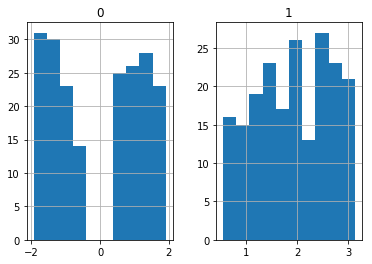

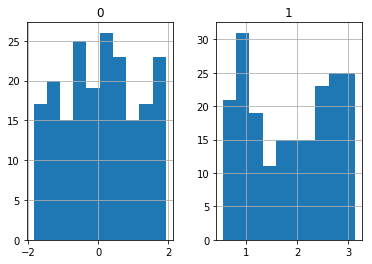

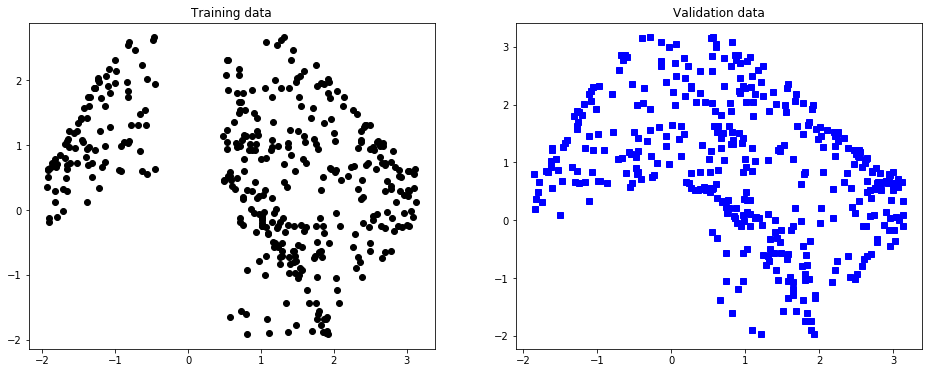

In [15]:
x_train.hist()#
#y_train.hist()
x_val.hist()
#y_val.hist()
# Graficación de los datos
gs = plt.GridSpec(1,2)
fig = plt.figure(figsize=(16,6))
s1 = fig.add_subplot(gs[0,0])
s1.plot(x_train[0:],y_train, 'ko')
plt.title("Training data")
s2 = fig.add_subplot(gs[0,1])
s2.plot(x_val,y_val,'bs')
plt.title("Validation data")

## b. Regresión lineal 
Modelo $f(x,a) = a_0+a_1x_1+a_2x_2$. Hallar $a = (a_0,a_1,a_2)$ que minimiza la función de error
$$E(a)=\frac{1}{2}\sum _{i=0}^N(y_i-f(x^i,a))^2$$

In [4]:
# Convert data to matrix form
X = x_train.values

# Response variable vector
y = y_train.values

## Training a linear regression

In [5]:
# Call implementation of multiple polynomial regression with polynomial of degree 1 for a linear fitting
mlin_reg = polynomial_linreg(X,y,1)
mlin_reg.fit()
a=mlin_reg.a
print(a)

[[ 1.08332958]
 [-0.54618495]
 [-0.30062493]]


In [6]:
#print(mlin_reg.intercept())
#for i in range (0,200):U
#    print(mlin_reg.predict(X[i]), y[i])

In [7]:
# Predictions
def predict(a,x):
    return  a[0][0]+a[1][0]*x[0] + a[2][0]*x[1]

# Función suma de errores cuadráticos medios
def sqerrors(x,y,thetas):
    s = 0.0
    for i in range(0,len(x)):
        s += (predict(thetas,x[i])-y[i][0])**2
    return np.sqrt(s/2)

print("Error on training set:", sqerrors(X,y,a))
print("Error on test set:", sqerrors(x_val.values,y_val.values,a))

Error on training set: 7.6788652149734204
Error on test set: 9.480140975366949


In [8]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)
#linreg.score(x_val,y_val)
#linreg.predict(X)[0]

# Función suma de errores cuadrados
def skl_sqerrors(x,y):
    s = 0.0
    xl = linreg.predict(x)
    for i in range(0,len(x)):
        s += (xl[i]-y[i][0])**2
    return np.sqrt(s/2)

print("Error on training set with linreg:", skl_sqerrors(X,y))
print("Error on test set with linreg:", skl_sqerrors(x_val.values,y_val.values))

[1.08332958]
[[-0.54618495 -0.30062493]]
Error on training set with linreg: [7.67886521]
Error on test set with linreg: [9.48014098]
